### Projeto Básico em Análise de Dados

In [50]:
import pandas as pd

funcionarios_df = pd.read_csv("CadastroFuncionarios.csv", sep = ";", decimal = ",") # para arquivos CSV / deixei também a tabela em condições de ser executada com separador de casas de acordo com o Python
clientes_df = pd.read_csv("CadastroClientes.csv", sep = ";", decimal = ",") # para arquivos CSV
serviços_df = pd.read_excel("BaseServiçosPrestados.xlsx") # para arquivos xlsx

funcionarios_df = funcionarios_df.drop(["Estado Civil", "Cargo"], axis = 1) # quando se dar o drop normal ele é default 0, para salientar a coluna tem que dar o comando axis = 1/axis = 0 -> índice


display(funcionarios_df)
display(clientes_df)
display(serviços_df)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


In [51]:
# FOLHA SALARIAL
funcionarios_df["Salario Total"] = funcionarios_df["Salario Base"] + funcionarios_df["Impostos"] + funcionarios_df["Beneficios"] + funcionarios_df["VT"] + funcionarios_df["VR"] # criei uma coluna a mais na tabela com nome salário total
salario_total = funcionarios_df["Salario Total"].sum()
print(f" O salário total mensal é: R${salario_total:,.2f}")

 O salário total mensal é: R$2,717,493.22


In [52]:
# FATURAMENTO DA EMPRESA
# SEMPRE PEGAR A TABELA CARACTERÍSTICA E JOGAR NA TABELA FATO PARA EVITAR PROBLEMAS
faturamento_df = serviços_df[["ID Cliente", "Tempo Total de Contrato (Meses)"]].merge(clientes_df[["ID Cliente", "Valor Contrato Mensal"]], on = "ID Cliente") # JOGANDO A TABELA CLIENTES DENTRO DA TABELA SERVIÇOS (CONCATENANDO)
# Obs: quando declaro a varíavel entre [] estou escrvendo minha nova coluna
faturamento_df["Faturamento Total"] = faturamento_df["Tempo Total de Contrato (Meses)"] * faturamento_df["Valor Contrato Mensal"]
display (faturamento_df)
faturamento_total = sum(faturamento_df["Faturamento Total"])
print(f"Meu faturamento total é de: R${faturamento_total:,.2f}")

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,Faturamento Total
0,1,14,540,7560
1,2,12,1260,15120
2,4,14,2520,35280
3,5,8,3510,28080
4,6,8,2340,18720
...,...,...,...,...
232,315,4,1575,6300
233,316,8,3690,29520
234,317,6,2385,14310
235,319,14,4185,58590


Meu faturamento total é de: R$5,519,160.00


In [54]:
# Funcionários que fecharam contrato (%)
qtd_contratos_fechados = len(serviços_df["ID Funcionário"].unique()) # unique remove os itens duplicados
qtd_total_fun = len(funcionarios_df["ID Funcionário"]) # quantitativo de funcionários por ID
porcetagem_contratos_fechados = qtd_contratos_fechados / qtd_total_fun
print(f"A porcetagem de contratos fechados por funcionários é: {porcetagem_contratos_fechados:.2%}")

A porcetagem de contratos fechados por funcionários é: 86.84%


,ID Funcionário,Area
0,67,Financeiro
1,67,Financeiro
2,67,Financeiro
3,67,Financeiro
4,17,Logística
...,...,...
232,25,Administrativo
233,79,Operações
234,99,Administrativo
235,14,Financeiro


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


<AxesSubplot:>

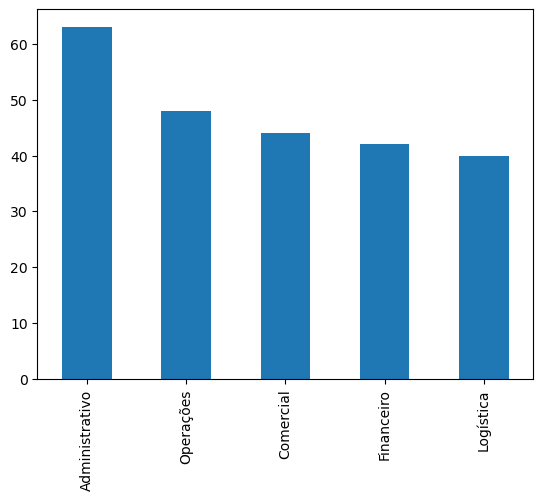

In [64]:
# Quantidade de contratos por àrea
contratos_area_df = serviços_df[["ID Funcionário"]].merge(funcionarios_df[["ID Funcionário", "Area"]], on = "ID Funcionário") # Joguei a tabela funcionário dentro da tabela serviços
display(contratos_area_df)
contratos_area_qtd = contratos_area_df["Area"].value_counts() # quero contar na coluna de área - qual coluna do meu DataFrame eu quero contar os valores (value_counts)
print(contratos_area_qtd)
contratos_area_qtd.plot(kind = "bar")

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


array([<AxesSubplot:ylabel='Area'>], dtype=object)

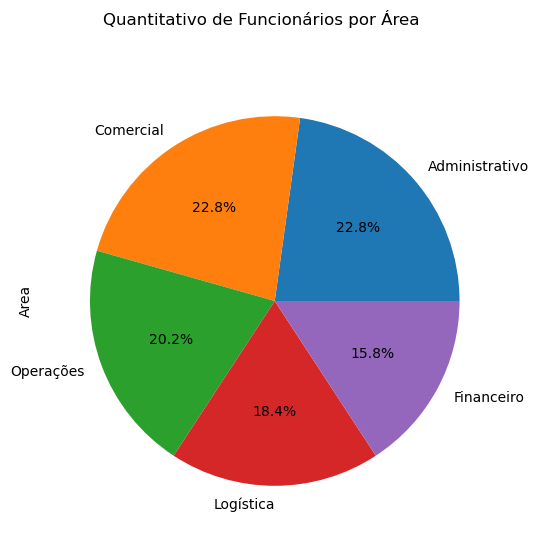

In [80]:
# Quantitativo de Funcionários por Área
funcionarios_area = funcionarios_df["Area"].value_counts()
print(funcionarios_area)
rotulos = ["Administrativo", "Comercial", "Operações", "Logística", "Financeiro"]
valores = [26, 26, 23, 21,18]
funcionarios_area.plot.pie(subplots=True, figsize=(11, 6), x = valores, labels = rotulos, autopct = "%1.1f%%", title = "Quantitativo de Funcionários por Área") # subplots = organiza plotagens em uma grade regular - figsize = tamanho do gráfico - x = valores e labels = nomes de cada parte (coluna)- autopct = mostrar a porcentagem no gráfico - title = nomear gráfico

In [71]:
# Ticket Médio Mensal
ticket_medio = clientes_df["Valor Contrato Mensal"].mean() # Calculando a média com mean
print(f"Ticket Médio Mensal é: R${ticket_medio:,.2f}")

Ticket Médio Mensal é: R$2,502.56
